# Lab 5 - Assignment
*This lab will work through saving the top n magnitude values at each frame in the STFT to build a very basic sinusoidal encoder.*

**Download the Voices folder from Bb Learn and place in same directory as this notebook to get started**

# <span style="color:red">Your Task for This Lab</span>

The notebook below walks through a very basic sinusoidal encoder. You will fill in the missing code pieces and then answer questions below. Anywhere you see "To Do" there is a line of code for you to write. The comments will suggest python functions that may be helpful.

## Import Libraries

In [36]:
import librosa
import numpy as np
import IPython.display as ipd

import matplotlib.pyplot as plt
%matplotlib inline

# Weird hack to get librosa.display to work properly
import librosa as _librosa
import librosa.display as _display
_librosa.display = _display

#plt.figure(figsize=(16,3))
#plt.plot(a);

## Load Audio File

In [10]:
filename = "Voices/male1.wav"
filename = "../final_project/Sounds/Overture.wav"
y, sr = librosa.load(filename)

In [12]:
y = y[:sr*20]     # get first 20 seconds of the song
ipd.Audio(y, rate = sr)

## Compute STFT 

In [41]:
# set the hop size
#hop = 128
#hop = 16
hop = 512

################################# To Do #################################
# compute the stft of y using the given hop size
# take the transpose of the stft so that time frames is the first dimension
# store the result in D
# Hint: use librosa.stft()
# Hint: transpose with ".T"

#D = librosa.stft(y, hop_length=hop).T

D = np.transpose(librosa.core.stft(y, hop_length=hop))

#print(len(D[0]))

##########################################################################

## Create Encoded Array

In [42]:
# n is the number of frequencies we will save at each frame
#n = 50
n = 1025
#n = 1000

################################# To Do #################################
# create an empty array a to hold the encoded signal
# for each time frame, we'll save frequency and magnitude of the top n frequencies 
# a should have the dimensions (# time frames in D, 2, n)
# Hint: use np.zeros()
a = np.zeros((len(D),2,n))
#print(a)
##########################################################################

## Encode Audio
*We will save the magnitude of the top n frequencies *

In [43]:
index = 0
for dft in D:
    
    ################################# To Do #################################
    # given the current time frame's dft, compute the magnitude spectrum
    # store the result in mag_spec
    # Hint: use np.abs()
    mag_spec = np.abs(dft)
    
    # create a list of frequencies in the dft domain
    # (it should be the same length as mag_spec)
    # store the result in freq
    # The frequencies are linearly spaced from zero to Nyquist
    # Hint: use np.arange()
    freq = np.arange(len(dft))/1024*(sr/2)
    #print(freq)
    ##########################################################################    
    
    
    
    # You can leave this next line alone
    # It sorts mag_spec and freq by descending magnitude
    # In other words, after running this line:
    #         the first entry of mag_spec will be the maximum magnitude value
    #         and the first entry of freq will be the frequency at which that value occurs
    #         the second entry of each corresponds to the 2nd highest magnitude, etc.
    mag_spec, freq = (list(t) for t in zip(*sorted(zip(mag_spec, freq),reverse = True)))
    
    
    
    
    
    ################################# To Do #################################
    # slice out the top n magnitudes and frequencies and store them in the encoded array
    # store the magnitudes at 0, and the frequencies at 1.
    a[index][0] = mag_spec[0:n]
    a[index][1] = freq[0:n]
    ########################################################################## 
    
    # this increments the index for each iteration
    index += 1



## Create Decoded Array

In [44]:
################################# To Do #################################
# create an empty array a to hold the decoded signal
# a should have the dimensions (1,0) so that we can concatenate frames along axis 1
# Hint: use np.zeros()
y_out = np.zeros((1,0))

#print(y_out)
##########################################################################

## Decode Audio
*Reconstruct using sum of weighted sinusoids*

In [45]:
################################# To Do #################################
# compute the duration (in sec) of each frame
# store the result in dur
# Hint: this depends on the hop size and the sampling rate.
dur = hop/sr
#print(dur)
##########################################################################

for frame in a:
    
    # get the amplitudes and frequencies for the current frame
    A = frame[0]
    F = frame[1]

    ################################# To Do #################################
    # create a time vector that spans the duration of a frame, dur
    # Hint: use np.linspace()
    t = np.linspace(0, dur, hop)
    ##########################################################################
    
    
    # this will make sure all of the arrays have the correct dimensions
    F.shape = (n,1)
    A.shape = (1,n)
    t.shape = (1,len(t))
    
    # Generate matrix of sinusoids
    sine_mat = np.cos(2 * np.pi * F * t)
    
    # Weight by amplitude vector A and sum
    sine_sum = np.dot(A,sine_mat)
    
    # append sine sum onto y_out vector
    y_out = np.concatenate((y_out,sine_sum),axis=1)

## Listen to the Decoded Signal

In [46]:
ipd.Audio(y_out, rate = sr)

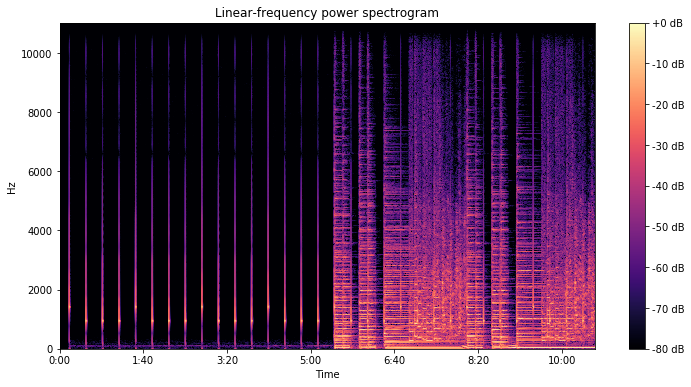

In [47]:
# set the hop size
window_length = 2048
hop_length = hop

#compute the stft of y and store it in S1
S1 = librosa.stft(y, 2048, hop_length, window_length)
SdB1 = librosa.amplitude_to_db(np.abs(S1),ref=np.max)
plt.figure(figsize=(12, 6));
ax = librosa.display.specshow(SdB1,x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB');
plt.title('Linear-frequency power spectrogram');
#ax.set_xlim([0,0.25])
#ax.set_ylim([0,5000])

# <span style="color:red">Questions to Answer</span>

- How does the hop size affect the quality of the decoded signal?
- How does the value of n affect the quality of the decoded signal?
- Leaving hop = 128, and n = 50, suggest and explain an improvement that could be made to this codec.


- Increasing the hop size leads to better quality/pitch

- Increasing n will lead to better quality. As n increases, you are looking at more frequencies (information).

- Overlap the hops